Linear regression with
# Categroical and Dummy variables

# One hot Encoding

# Theory Part

As usual we have home prices data but the thing that is different this time is extra township column:

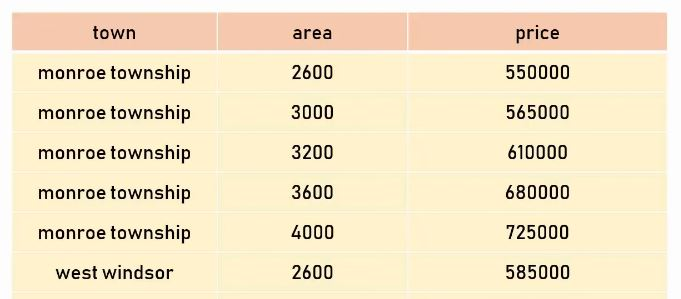

Uptil now we are predictiong homeprices only in monroe township but now we expand this problem further to other towns as well so that we now we have different columns for other towns as well like west windsor and robinsville.

Given this data we want to build a predictor funtion that can take the square foot of the home and name of the township as an input and it can tell me the price.

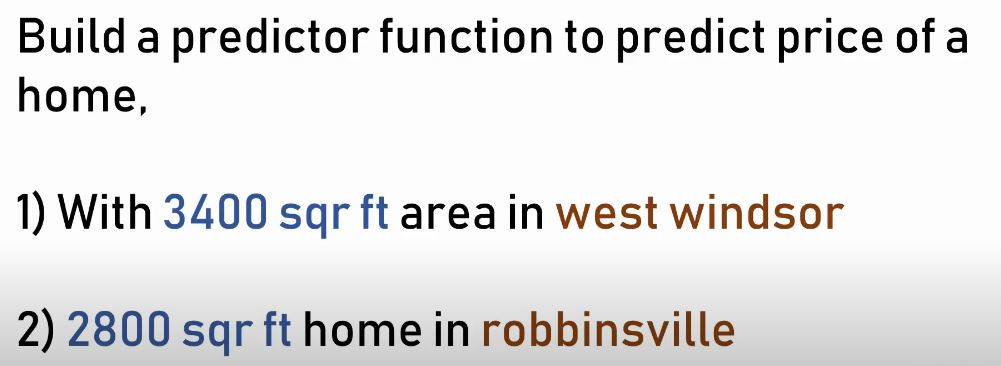

Now when we look at the data the first the first question that arises is that how we handle the text data:

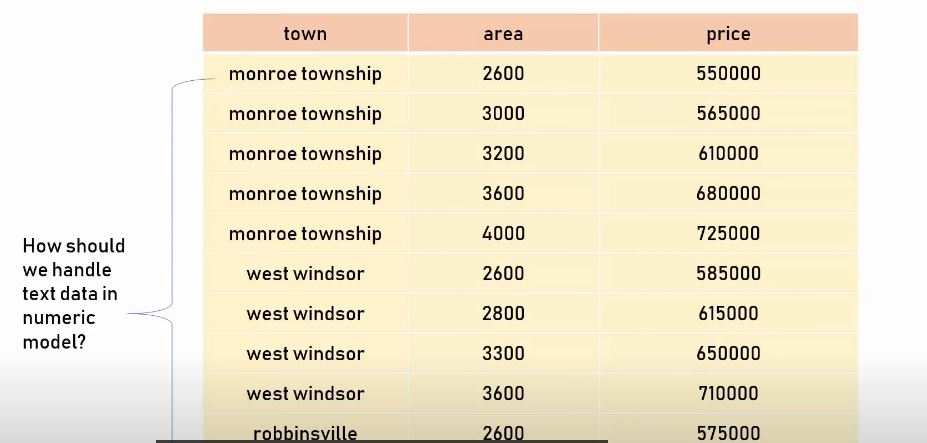
 to 
because ml models are good with handling the numeric data so one way to do this would be to use integer encoding or label encoding where you convert name of the town to a specific integer number.

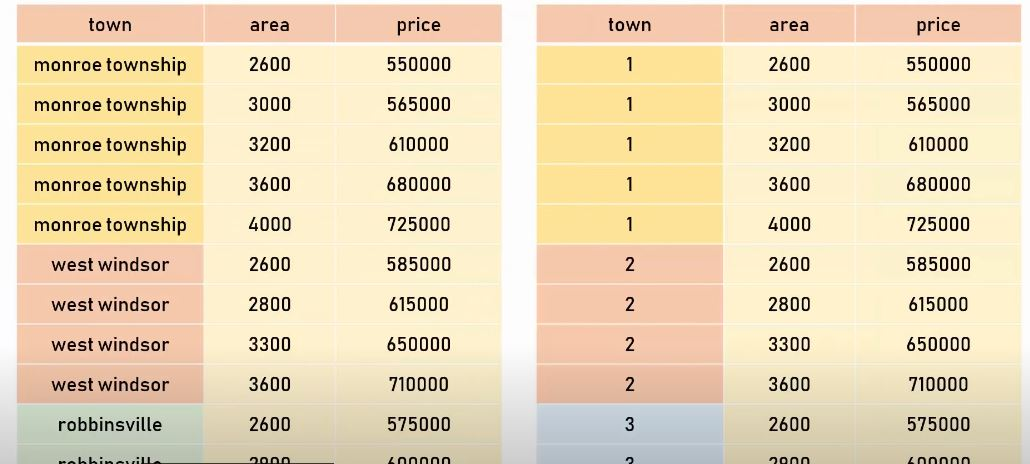

But the problem with this approach could be that you are assigning numbers to these townships and when you give this to your model which is working on the numbers it will assume the order and it will make assummptions such as shown:

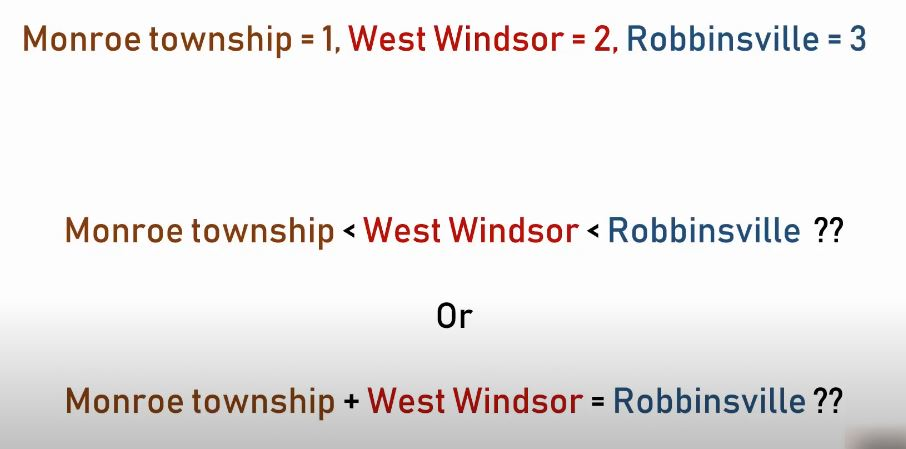.

And this doesnt quite make sense. These variables are called Categorical variables and the name of the township that we are dealing with is called nominal variables so in categorical variables there are 2 types:

1. Nominal where categories dont have any numeric ordering in between that and they dont have any order relationship between eachother and other types of variable names are male and female or name of colors.
2. Ordinal where categories have some sort of numerical ordering in between them for example you are talking abput the college degree if it is graduate or masters or phd then we can say that graduate is less than master which is less than phd and there are other examples of ordinal categories such as customers satisfaction survey where you give your rating such as satisfy neutral or dissatisfied and these you can order numerically as shows:
   
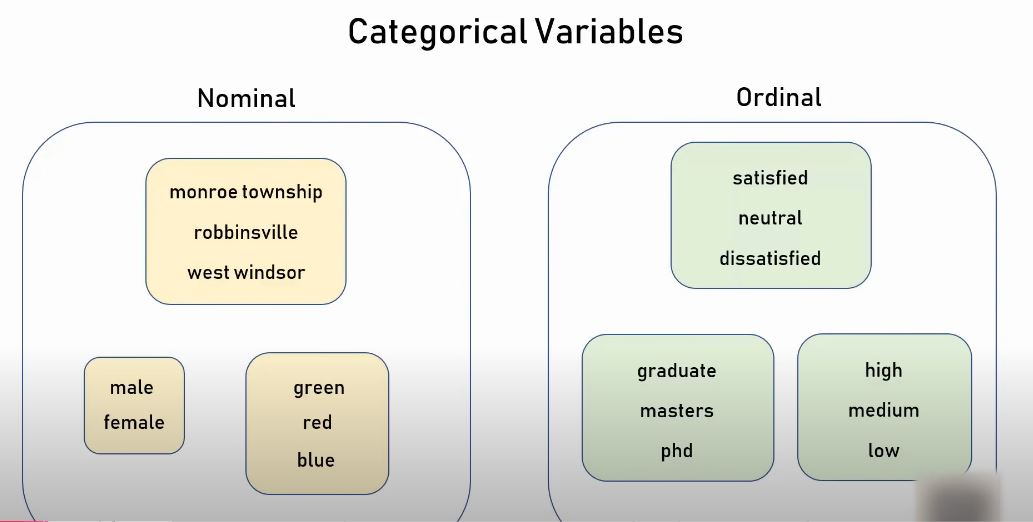.

Now we know that we are dealing with nominal categorical variables and simple integer encoding is not going to work hence we are going to use a technique called one hot encoding.

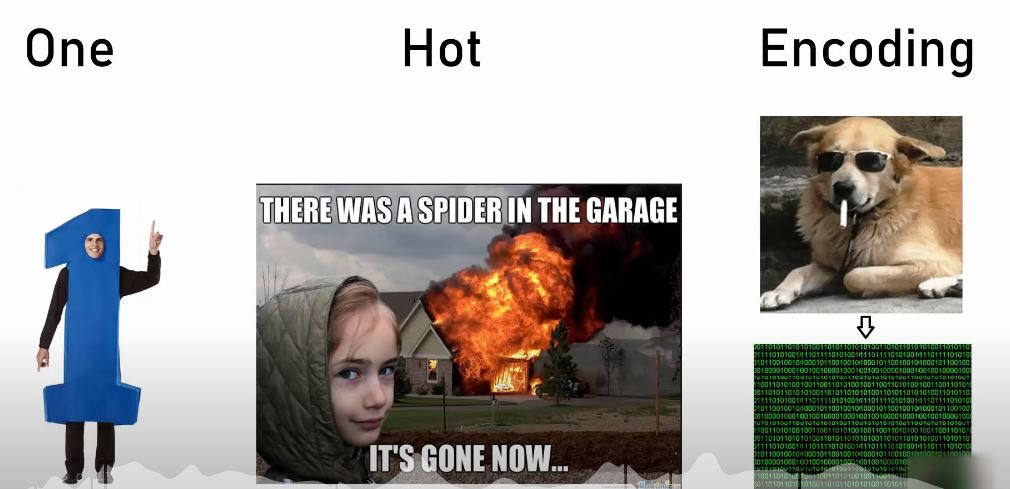

So the way one hot encoding works is you create a new columns for each of your categories and assign binary values of one or zero as shown in fig here:

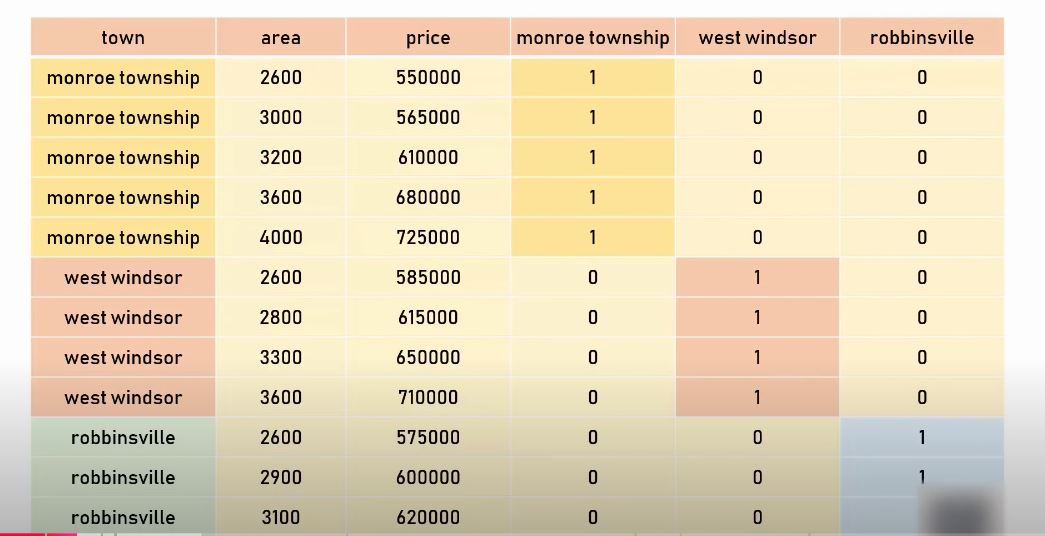.

So we will use this one hot encoding technique to solve our problem and these extra variables that are created they are also called dummy variables.

# Coding Part

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('05_homeprices.csv')
df.head(5)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [12]:
dummies = pd.get_dummies(df.town)
dum = dummies.astype(int)
dum

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [13]:
merged = pd.concat([df,dum],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [16]:
final = merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [17]:
# creating linear regression model

In [61]:
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model2 = linear_model.LinearRegression()



In [27]:
X = final.drop('price',axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [28]:
Y = final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [29]:
# training ML model
model.fit(X,Y)

LinearRegression()

In [34]:
model.predictt([[2800,0,1]])

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [35]:
model.predict([[3400,0,0]])

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [36]:
# checking accuracy of model
model.score(X,Y)

0.9573929037221872

In [37]:
# Using sklearn one Hot Encoder

In [38]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [39]:
# first we have to do label encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
dfle = df
dfle.town = le.fit_transform(dfle.town) # returning labels
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [47]:
X = dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [48]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [54]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [55]:
X = X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [62]:
model2.fit(X,y)

LinearRegression()

In [63]:
model2.predict([[1,0,2800]])

array([590775.63964739])

In [64]:
model2.predict([[0,1,3400]])

array([681241.6684584])

In [65]:
model2.score(X,y)

0.9573929037221873